In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
# vncorenlp
!pip install vncorenlp
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr

!mkdir -p vncorenlp/models/wordsegmenter

!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

# vietnamese stopword
!wget https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt

# Unicode
!pip install unidecode

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from vncorenlp import VnCoreNLP
from itertools import chain
from unidecode import unidecode
import re

# Load data

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/Public/CS221 - Natural Language Processing/uit_vsmec/train_nor_811.xlsx'
VAL_PATH = '/content/drive/MyDrive/Public/CS221 - Natural Language Processing/uit_vsmec/valid_nor_811.xlsx'
TEST_PATH = '/content/drive/MyDrive/Public/CS221 - Natural Language Processing/uit_vsmec/test_nor_811.xlsx'

IMGS_PATH = '/content/drive/MyDrive/Public/CS221 - Natural Language Processing/imgs/'

# vietnamese stopwords
STOPWORD_PATH = 'vietnamese-stopwords.txt'

In [ ]:
train = pd.read_excel(TRAIN_PATH)
val = pd.read_excel(VAL_PATH)
test = pd.read_excel(TEST_PATH)

COLS = ['index', 'emotion', 'sentence']

train.columns = COLS
val.columns = COLS
test.columns = COLS

train.drop('index', axis=1, inplace=True)
val.drop('index', axis=1, inplace=True)
test.drop('index', axis=1, inplace=True)

In [ ]:
train.shape, val.shape, test.shape

((5548, 2), (686, 2), (693, 2))

In [ ]:
LABELS = np.unique(train['emotion'])
NUM_LABELS = len(LABELS)

# EDA

In [ ]:
train.info(), print(), val.info(), print(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5548 entries, 0 to 5547
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   emotion   5548 non-null   object
 1   sentence  5548 non-null   object
dtypes: object(2)
memory usage: 86.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   emotion   686 non-null    object
 1   sentence  686 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   emotion   693 non-null    object
 1   sentence  693 non-null    object
dtypes: object(2)
memory usage: 11.0+ KB


(None, None, None, None, None)

In [ ]:
def label_distribution_plot(data, title):
    x = data.emotion.value_counts().index
    y = data.emotion.value_counts()
    fig = plt.figure(figsize=(8, 6))
    sns.barplot(x=x, y=y)
    plt.title("Phân bố các nhãn của tập " + title)
    plt.xlabel("Cảm xúc")
    plt.ylabel("Số lượng")
    plt.savefig(IMGS_PATH + title + '.png')
    plt.show()

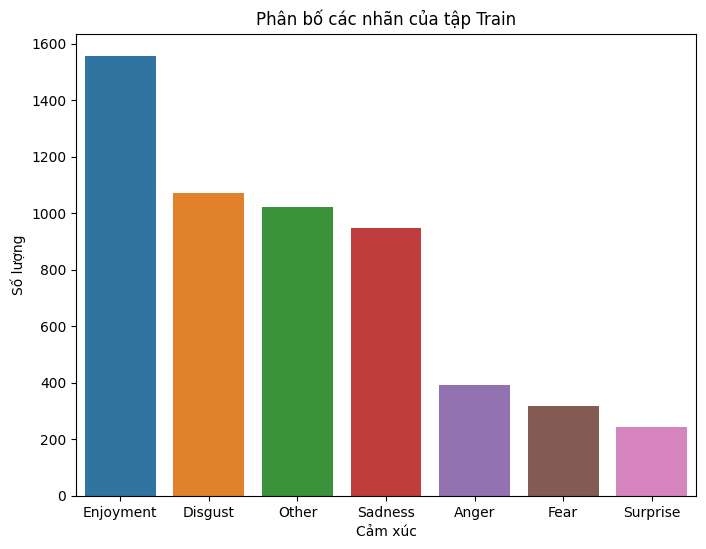

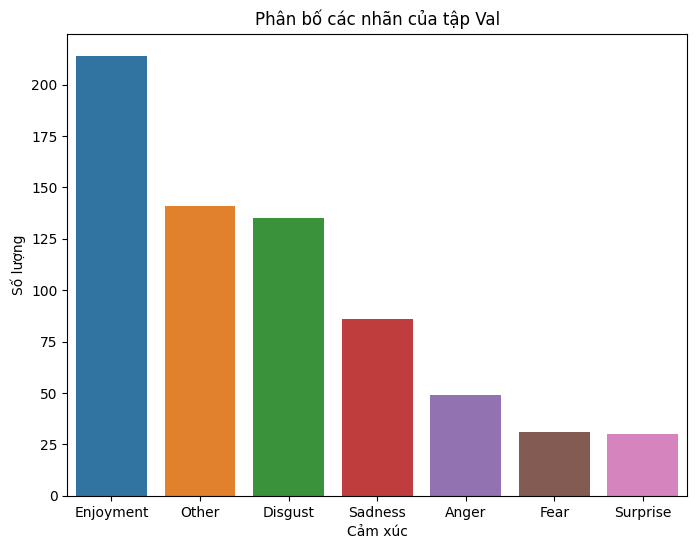

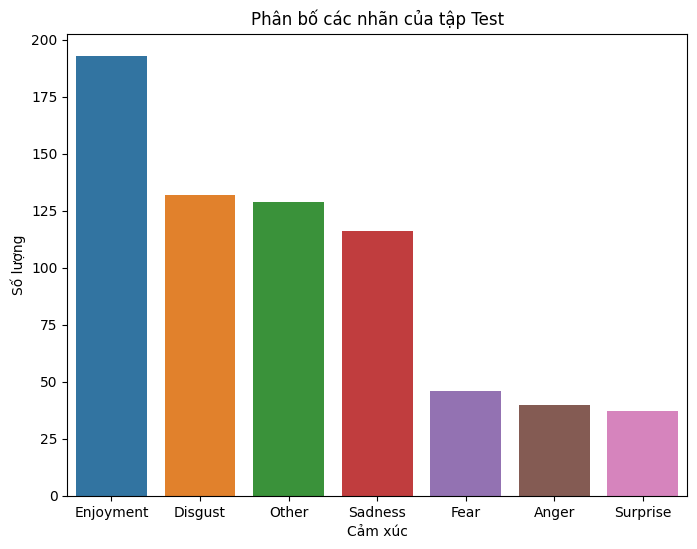

In [ ]:
label_distribution_plot(train, 'Train')
print()
label_distribution_plot(val, 'Val')
print()
label_distribution_plot(test, 'Test')

# Preprocessing

In [ ]:
vncorenlp = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [ ]:
with open(STOPWORD_PATH, 'r') as file:
    vi_stopwords = file.readlines()
vi_stopwords = [sw.strip() for sw in vi_stopwords if sw.strip()]

In [ ]:
def is_word(element):
    pattern = r'^\w+$'
    return re.match(pattern, element) is not None

# Remove special characters & stopwords
def remove_characters(txt_data):
    cleaned = []
    for token in txt_data:
        # if token not in vi_stopwords and is_word(unidecode(token)):
        if is_word(unidecode(token)):
            cleaned.append(token)
    return cleaned

def preprocess(txt):
    # Lower case
    txt = txt.lower()
    # Tokenization
    txt = vncorenlp.tokenize(txt)
    txt = list(chain.from_iterable(txt))
    # Special character removal
    txt = remove_characters(txt)
    txt = list(filter(lambda x: x != '', txt))

    txt = ' '.join(txt).replace('_', ' ')
    return txt.strip()

In [ ]:
train['cleaned_sentence'] = train['sentence'].map(preprocess)
val['cleaned_sentence'] = val['sentence'].map(preprocess)
test['cleaned_sentence'] = test['sentence'].map(preprocess)

In [ ]:
train.drop('sentence', axis=1, inplace=True)
val.drop('sentence', axis=1, inplace=True)
test.drop('sentence', axis=1, inplace=True)

In [ ]:
train.to_csv('/content/drive/MyDrive/Public/CS221 - Natural Language Processing/uit_vsmec_processed/train_precessed.csv', index=False)
val.to_csv('/content/drive/MyDrive/Public/CS221 - Natural Language Processing/uit_vsmec_processed/val_precessed.csv', index=False)
test.to_csv('/content/drive/MyDrive/Public/CS221 - Natural Language Processing/uit_vsmec_processed/test_precessed.csv', index=False)